In [ ]:
import pygame
import math

# Initialize Pygame
pygame.init()

# Set up the display
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Moving Polygon")

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Polygon properties
polygon_points = [(0, -20), (10, 10), (-10, 10)]  # Triangle shape
x, y = width // 2, height // 2  # Initial position
angle = 0  # Initial angle
speed = 5  # Movement speed

# Game loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Handle key presses
    keys = pygame.key.get_pressed()
    dx, dy = 0, 0
    if keys[pygame.K_LEFT]:
        dx = -speed
    if keys[pygame.K_RIGHT]:
        dx = speed
    if keys[pygame.K_UP]:
        dy = -speed
    if keys[pygame.K_DOWN]:
        dy = speed

    # Update position
    x += dx
    y += dy

    # Update angle if moving
    if dx != 0 or dy != 0:
        angle = math.atan2(dy, dx)

    # Clear the screen
    screen.fill(BLACK)

    # Rotate and draw the polygon
    rotated_points = []
    for point in polygon_points:
        rotated_x = point[0] * math.cos(angle) - point[1] * math.sin(angle)
        rotated_y = point[0] * math.sin(angle) + point[1] * math.cos(angle)
        rotated_points.append((rotated_x + x, rotated_y + y))

    pygame.draw.polygon(screen, WHITE, rotated_points, 2)  # 2 is the line thickness

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(60)

# Quit Pygame
pygame.quit()

In [2]:
import pygame
import math

# Initialize Pygame
pygame.init()

# Set up the display
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Moving Polygon")

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Polygon properties
polygon_points = [(0, -20), (10, 10), (-10, 10)]  # Triangle shape
x, y = width // 2, height // 2  # Initial position
angle = 0  # Initial angle
speed = 5  # Movement speed

# Create a surface for the polygon
polygon_size = 50
polygon_surface = pygame.Surface((polygon_size, polygon_size), pygame.SRCALPHA)
pygame.draw.polygon(polygon_surface, WHITE, 
                    [(p[0] + polygon_size//2, p[1] + polygon_size//2) for p in polygon_points], 2)

# Game loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Handle key presses
    keys = pygame.key.get_pressed()
    dx, dy = 0, 0
    if keys[pygame.K_LEFT]:
        dx = -speed
    if keys[pygame.K_RIGHT]:
        dx = speed
    if keys[pygame.K_UP]:
        dy = -speed
    if keys[pygame.K_DOWN]:
        dy = speed

    # Update position
    x += dx
    y += dy

    # Update angle if moving
    if dx != 0 or dy != 0:
        angle = math.atan2(dy, dx)

    # Clear the screen
    screen.fill(BLACK)

    # Rotate the polygon surface
    rotated_surface = pygame.transform.rotate(polygon_surface, -math.degrees(angle))
    
    # Get the rect of the rotated surface and position it
    rect = rotated_surface.get_rect(center=(x, y))

    # Draw the rotated surface
    screen.blit(rotated_surface, rect.topleft)

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(60)

# Quit Pygame
pygame.quit()

In [ ]:
import matplotlib.pyplot as plt
from utils.lerp import Lerp
import numpy as np
import math
lerpEx = Lerp()
lnsp = np.linspace(0, 1, 50)
a = 0
b = 10
k = []

def doStuff(lerp):
    lerp.drive() 
    v = lerpEx.Sinusoidal(-1, 1, 5) * lerpEx.easeOut(1, 0)
    # v = lerpEx.easeOut(1, 0)
    k.append(v)  

while lerpEx.do(3000, doStuff).isDone() == False:
    pass


    

plt.plot(k)
plt.show()

    



In [10]:
ite = [1,2,3,4,5,6,7,8,9]
r = tuple(map(lambda x : x + 2, ite))
print(r)

(3, 4, 5, 6, 7, 8, 9, 10, 11)


In [3]:
from utils.lerp import Lerp
import time
l1 = Lerp()


def call1(lerp):
    # lerp.drive()
    return lerp.linear(0, 10)
    
def call2(lerp):
    # lerp.drive()
    return lerp.ease_in(0, 20)

In [ ]:
# duration = 3000
t1 = time.time() * 1000
t2 = 0
done = False
# while t2 - t1 < duration:
while done == False:
    # t2 = time.time() * 1000
    time.sleep(0.1)
    # m = l1.do(500, call1).andThen(500, call2).andWait(500).andThen(500, call2, lambda: print('done'))
    m = l1.do(500, call1, lambda: print('done'))
    print(m.value)
    done = m.is_done
    


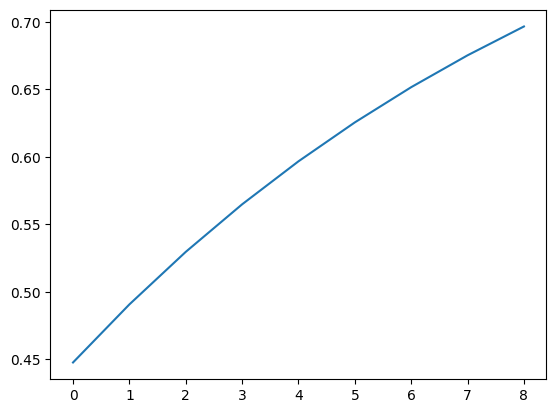

In [16]:
import math
import matplotlib.pyplot as plt

def asymptotic_value(min_value, max_value, rate, time):
    return max_value - (max_value - min_value) * math.exp(-rate * time)

k = []
for i in range(1, 10):
    # k.append(math.log(i)*.08)
    v = asymptotic_value(.4, .9, .1, i)
    k.append(v)
    
plt.plot(k)
plt.show()
